# Задача

На примере одного из текстов проектного датасета (тексты с planeta.ru) извлечь имена собственные людей и животных c ипользованием Natasha и Yagry.

In [1]:
text = '''Цель проекта - ликвидировать долги за ветеринарные услуги, накопившиеся в январе 2017 года за 
лечение, рентген, анестезию, УЗИ, анализы, инъекции питомцам "Островка надежды" г.Пермь
И снова здравствуйте, Друзья!
Меня зовут Надежда Николаевна, я директор Местной общественной организации защитников животных 
"Островок надежды" г.Пермь, мы называем себя Центром реабилитации для собак "Островок надежды" НЕ 
являемся муниципальным приютом и не получаем бюджетных денежных средств.
История нашего Островка началась в 2010 году. В настоящее время в Островке нашли свой дом 450 собак и 
бывшедомашний, особенный кот Кипиш , который после случившейся трагедии в 2017 году стал инвалидом и 
находится в стационаре на лечении.
Все питомцы Островка, в т. ч. особенные и возрастные собаки живут и получают ветеринарную помощь с первого до последнего дня и проживают до тех пор пока не найдут своего хозяина.
В этой жизни их никто не ждал, но они выжили и с первых дней, как могли боролись за нее. Сейчас все иначе, 
теперь мы вместе боремся за каждого питомца. Это становится возможным благодаря помощи, поступающей от 
благотворителей, помощников, волонтеров, всех неравнодушных Пермяков и конечно Вашей неоценимой помощи, 
Друзья.
Цель нашего проекта "Не вешай нос! Или право на жизнь" - ликвидировать долг за ветеринарные услуги, 
накопившиеся в январе и начале февраля 2017 года.
С тяжёлыми травмами, обмороженные, голодные, с множеством болезней, животные попадают в приют. 
Мы - немногочисленная команда волонтеров и сотрудники приюта, действительно всеми силами отвоевываем 
каждого питомца у смерти, возвращая им веру в человечность людей.
Сегодня мы Вас знакомим с 9 нашими питомцами, которым уже с первых дней начавшегося 2017 года потребовалась 
неотложная ветеринарная помощь. В январе средств не было, но и поступить по-другому мы не имели право. 
Лечили в долг. Спасибо Клинике "Ветлайн" за сотрудничество, за предоставление скидок на лечение наших 
питомцев, за оказание необходимой помощи в долг.
Девять Островитян нуждаются в оплате за лечение, проведенные процедуры, рентген, анастезию, УЗИ, анализы, 
инъекции...
Сегодня их жизни уже ничего не угрожает, лечение продолжается, но образовавшийся долг остался.
Маня Печенька
Хрюня Рекс|
Люся
Джина Маша
Студент
Лаки
Тайга
В январе спасен кот Кипиш (кота разорвали собаки, Кипиш потерял переднюю лапку), в настоящее время 
находится в стационаре на лечении.
Лечение дорогостоящее, не судите нас, но мы ни на минуту не сомневались, что кота нужно спасать, силы и 
средства брошены на спасение маленькой, хрупкой жизни Кипиша.
Документы, подтверждающие расходы:
Вы были с нами каждый Проект, поддерживали и помогали.
Мы боль сердец свою несли, и Вы нас выручали.
Не останьтесь в стороне! Примите участие в Проекте!
Всегда Ваши "Островок надежды" г. Пермь'''

# Natasha

In [2]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install natasha

Note: you may need to restart the kernel to use updated packages.


Тетрадки с аудиторных занятий у меня не сработали, что странно: раньше я уже пробовала парсить тексты прямо в них. Вероятно, библиотека обновилась. Поэтому пришлось изучать репозитории на гитхабе. Там я нашла разные скрипты для извлечения информации, но тоже сработали не все. 

Например, такой код ⬇︎ приводится в примерах в репозитории Natasha для парсинга имен собств. из новостей и отзывов о воспитателях, но у меня он выдает ошибки: 

No module named natasha.markup

Match object has no attribute span

In [4]:
from random import sample
from natasha import NamesExtractor
from natasha import MorphVocab
#from natasha.markup import show_markup, show_json  #No module named 'natasha.markup'

morph_vocab = MorphVocab()
extractor = NamesExtractor(morph_vocab) 

matches = extractor(text)
spans = [_.span for _ in matches]
show_markup(text, spans)
facts = [_.fact.as_json for _ in matches]
show_json(facts)

AttributeError: 'Match' object has no attribute 'span'

У Natasha есть преобразователь в собственный объект - doc. В документации сказано:
One may use Natasha components independently. It is not mandatory to construct Doc object. В том числе - сказано, что можно использовать отдельно экстракторы. In addition to names_extractor Natasha bundles several other extractors: dates_extractor, money_extractor and addr_extractor. Names_extractor should be applied only to spans of text. To extract single fact use method find.

Но проверить на своем тексте без создания объекта doc у меня не получилось: методы не работают со строкой, а только со spans, но превратить строку в spans без doc у меня не получилось. 

In [5]:
# пример автономного использования экстрактора из документации (работает)

from natasha import NewsNERTagger, NewsEmbedding
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

lines = [
    'Мустафа Джемилев',
    'О. Дерипаска',
    'Фёдор Иванович Шаляпин',
    'Янукович'
]
for line in lines:
    display(names_extractor.find(line))

Match(
    start=0,
    stop=16,
    fact=Name(
        first='Мустафа',
        last='Джемилев'
    )
)

Match(
    start=0,
    stop=12,
    fact=Name(
        first='О',
        last='Дерипаска'
    )
)

Match(
    start=0,
    stop=22,
    fact=Name(
        first='Фёдор',
        last='Шаляпин',
        middle='Иванович'
    )
)

Match(
    start=0,
    stop=8,
    fact=Name(
        last='Янукович'
    )
)

In [6]:
# попытка на своем тексте: не работает - берет только первое слово, сегментатор использовать не хочет. 

from natasha import Segmenter
segmenter = Segmenter()
#new_text = text.segment(segmenter)
display(names_extractor.find(text)) 

Match(
    start=0,
    stop=4,
    fact=Name(
        last='Цель'
    )
)

Пробую с созданием объекта natasha.doc

In [7]:
from natasha import Segmenter, MorphVocab, NewsMorphTagger, NewsNERTagger, PER, NamesExtractor, Doc

segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_tagger = NewsMorphTagger(emb)

ner_tagger = NewsNERTagger(emb)
names_extractor = NamesExtractor(morph_vocab)

In [8]:
doc = Doc(text)
doc

Doc(text='Цель проекта - ликвидировать долги за ветеринарны...)

In [9]:
# сегментация на предложения

doc.segment(segmenter)
display(doc)
display(doc.sents)
display(doc.tokens[:5])

Doc(text='Цель проекта - ликвидировать долги за ветеринарны..., tokens=[...], sents=[...])

[DocSent(stop=212, text='Цель проекта - ликвидировать долги за ветеринарны..., tokens=[...]),
 DocSent(start=213, stop=480, text='Меня зовут Надежда Николаевна, я директор Местной..., tokens=[...]),
 DocSent(start=481, stop=526, text='История нашего Островка началась в 2010 году.', tokens=[...]),
 DocSent(start=527, stop=720, text='В настоящее время в Островке нашли свой дом 450 с..., tokens=[...]),
 DocSent(start=721, stop=899, text='Все питомцы Островка, в т. ч. особенные и возраст..., tokens=[...]),
 DocSent(start=900, stop=988, text='В этой жизни их никто не ждал, но они выжили и с ..., tokens=[...]),
 DocSent(start=989, stop=1052, text='Сейчас все иначе, \nтеперь мы вместе боремся за к..., tokens=[...]),
 DocSent(start=1053, stop=1224, text='Это становится возможным благодаря помощи, поступ..., tokens=[...]),
 DocSent(start=1225, stop=1259, text='Цель нашего проекта "Не вешай нос!', tokens=[...]),
 DocSent(start=1260, stop=1375, text='Или право на жизнь" - ликвидировать долг за ве

[DocToken(stop=4, text='Цель'),
 DocToken(start=5, stop=12, text='проекта'),
 DocToken(start=13, stop=14, text='-'),
 DocToken(start=15, stop=28, text='ликвидировать'),
 DocToken(start=29, stop=34, text='долги')]

In [10]:
# типы найденных сущностей

doc.tag_ner(ner_tagger)
display(doc.spans)

# Не работает без предварительной сегментации (doc.segment), ошибка 'NoneType' object is not iterable

[DocSpan(start=177, stop=182, type='LOC', text='Пермь', tokens=[...]),
 DocSpan(start=224, stop=242, type='PER', text='Надежда Николаевна', tokens=[...]),
 DocSpan(start=255, stop=326, type='ORG', text='Местной общественной организации защитников живот..., tokens=[...]),
 DocSpan(start=330, stop=335, type='LOC', text='Пермь', tokens=[...]),
 DocSpan(start=354, stop=402, type='ORG', text='Центром реабилитации для собак "Островок надежды', tokens=[...]),
 DocSpan(start=496, stop=504, type='PER', text='Островка', tokens=[...]),
 DocSpan(start=547, stop=555, type='LOC', text='Островке', tokens=[...]),
 DocSpan(start=613, stop=618, type='PER', text='Кипиш', tokens=[...]),
 DocSpan(start=733, stop=741, type='LOC', text='Островка', tokens=[...]),
 DocSpan(start=1172, stop=1180, type='LOC', text='Пермяков', tokens=[...]),
 DocSpan(start=1876, stop=1883, type='PER', text='Клинике', tokens=[...]),
 DocSpan(start=1885, stop=1892, type='ORG', text='Ветлайн', tokens=[...]),
 DocSpan(start=2219, sto

In [11]:
pip install yargy ipymarkup

Note: you may need to restart the kernel to use updated packages.


In [12]:
# разметка в тексте
doc.ner.print()

Цель проекта - ликвидировать долги за ветеринарные услуги, 
накопившиеся в январе 2017 года за 
лечение, рентген, анестезию, УЗИ, анализы, инъекции питомцам "Островка
 надежды" г.Пермь
            LOC──
И снова здравствуйте, Друзья!
Меня зовут Надежда Николаевна, я директор Местной общественной 
           PER───────────────             ORG──────────────────
организации защитников животных 
────────────────────────────────
"Островок надежды" г.Пермь, мы называем себя Центром реабилитации для 
─────────────────    LOC──                   ORG──────────────────────
собак "Островок надежды" НЕ 
───────────────────────     
являемся муниципальным приютом и не получаем бюджетных денежных 
средств.
История нашего Островка началась в 2010 году. В настоящее время в 
               PER─────                                           
Островке нашли свой дом 450 собак и 
LOC─────                            
бывшедомашний, особенный кот Кипиш , который после случившейся 
                           

In [13]:
# печатаем только имена (без локаций)

for span in doc.spans:
    if span.type == PER:
        print(span)

DocSpan(start=224, stop=242, type='PER', text='Надежда Николаевна', tokens=[...])
DocSpan(start=496, stop=504, type='PER', text='Островка', tokens=[...])
DocSpan(start=613, stop=618, type='PER', text='Кипиш', tokens=[...])
DocSpan(start=1876, stop=1883, type='PER', text='Клинике', tokens=[...])
DocSpan(start=2219, stop=2243, type='PER', text='Маня Печенька\nХрюня Рекс', tokens=[...])
DocSpan(start=2269, stop=2279, type='PER', text='Лаки\nТайга', tokens=[...])
DocSpan(start=2300, stop=2305, type='PER', text='Кипиш', tokens=[...])
DocSpan(start=2330, stop=2335, type='PER', text='Кипиш', tokens=[...])
DocSpan(start=2574, stop=2580, type='PER', text='Кипиша', tokens=[...])


Неплохо, но:

 - извлеклось не все (Студент, Джина, Люся...)
 - некоторые токены склеились из-за верстки (Маня Печенька\nХрюня Рекс)
 - извлеклось лишее (Островка)
 
 
Возможно, помогла бы предобработка текста, но в документации Наташи сказано, что для realworld задач лучше писать свои парвила на Yargy, который и работает "под капотом" Natasha.

# Yargy

In [14]:
from yargy import Parser, rule, and_, not_, or_
from yargy.interpretation import fact
from yargy.predicates import gram, is_capitalized, dictionary, gte, lte, length_eq, custom, eq
from yargy.relations import gnc_relation
from yargy.pipelines import morph_pipeline
from ipymarkup import show_span_ascii_markup as show_markup
from IPython.display import display

In [15]:
import graphviz
!dot -V # проверяет версияю утилиты graphviz

dot - graphviz version 2.44.0 (20200408.0750)


In [16]:
from IPython.display import display

Person(
    position=None,
    name='надежда',
    middle='николаевна',
    surname=None
)

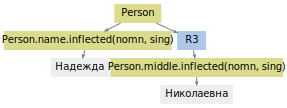

Person(
    position='кот',
    name='кипиш',
    middle=None,
    surname=None
)

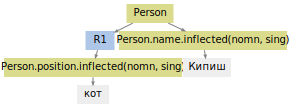

Person(
    position=None,
    name='ветлайна',
    middle=None,
    surname=None
)

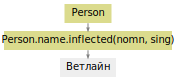

Person(
    position=None,
    name='маня',
    middle=None,
    surname=None
)

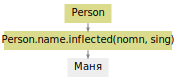

Person(
    position=None,
    name='хрюня',
    middle=None,
    surname=None
)

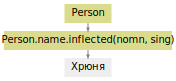

Person(
    position=None,
    name='рекс',
    middle=None,
    surname=None
)

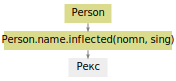

Person(
    position=None,
    name='люся',
    middle=None,
    surname=None
)

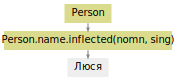

Person(
    position=None,
    name='джина',
    middle=None,
    surname=None
)

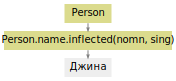

Person(
    position=None,
    name='маша',
    middle=None,
    surname=None
)

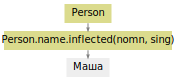

Person(
    position='кот',
    name='кипиш',
    middle=None,
    surname=None
)

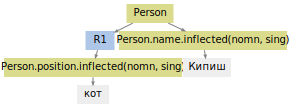

Person(
    position=None,
    name='кипиш',
    middle=None,
    surname=None
)

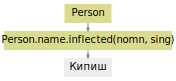

Person(
    position=None,
    name='кипишущий',
    middle=None,
    surname=None
)

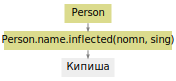

In [17]:
Person = fact(
    'Person',
    ['position', 'name', 'middle', 'surname']
)


POSITION = morph_pipeline([  #должность видит только непосредственно перед именем без разрыва
    'премьер министр',
    'директор',
    'президент',
    'кот',       # пусть кот\пес будет как бы должностью для наших целей
    'пес',
    'котик',
    'лабрадор',
    'спикер'
             
])


ABBR = gram('Abbr') 
# без ограничения на сокращения однобуквенные предлоги в нач. предлож. (т.е. capitalized) считает инициалами

NAME = rule(and_(gram('Name'), not_(ABBR), is_capitalized()))
MID = rule(and_(gram('Patr'), not_(ABBR), is_capitalized()))
SURN = rule(and_(gram('Surn'), not_(ABBR), is_capitalized()))

PERSON1 = rule(
    POSITION.interpretation(Person.position.inflected()).repeatable().optional(),
    NAME.interpretation(Person.name.inflected()), 
    MID.interpretation(Person.middle.inflected()).repeatable().optional(),
    SURN.interpretation(Person.surname.inflected()).repeatable().optional()).interpretation(Person)

# парсер с этим правилом ⬆︎ должен вытащить все, что сочтет именами, +\- positions +\- отчества +\- фамилиии

parser1 = Parser(PERSON1)


for match in parser1.findall(text): 
    display(match.fact)
    display(match.tree.as_dot)
    
# у парсера два метода: match и findall, match смотрит, равна ли вся строка правилу

⬆︎ Нашел все имена, но посчитал именем название клиники (Ветлайн), а 'Кипиш' в Gen посчитал деепричастием. То есть получилось, что во фразе "...спасение маленькой, хрупкой жизни Кипиша" - "кипишА" - это оттенок действия :) Это согласуется с результатом морфологической разметки:

MorphToken(
     value='Кипиша',
     span=[2557, 2563),
     type='RU',
     forms=[Form('киписать', Grams(GRND,impf,pres,tran)),
      Form('кипиш', Grams(NOUN,Name,anim,gent,masc,sing)),
      Form('кипиш', Grams(NOUN,Name,accs,anim,masc,sing))]

Но не очень согласуется с реальностью.

В документации Yargy упоминается функция activate, которая позволяет указать только на те сущности, в разборе которых есть определенные грамемы. Теоретически можно было бы использовать ее в обратной задаче: исключить сущности с грамемой GRND, но я не нашла примеров такого использования, кроме того, даже для первоначальной задачи функция activate у меня не сработала (библиотека ее не находит, возможно, она была исключена).

Person(
    position=None,
    name=None,
    middle=None,
    surname='пермяк'
)

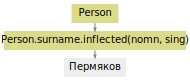

In [18]:
PERSON2 = rule(
    POSITION.interpretation(Person.position.inflected()).repeatable().optional(),
    SURN.interpretation(Person.surname.inflected())).interpretation(Person)

# парсер с этим правилом ⬆︎ должен вытащить все фамилии +\- должности 
# но если между должностью и фамилией есть имя, то не найдет


parser2 = Parser(PERSON2)


for match in parser2.findall(text):
    display(match.fact)
    display(match.tree.as_dot)

# у парсера два метода: match и findall, match смотрит, равна ли вся строка правилу

В нашем случае находит не то, что нужно.

Для моих задач фамилии сами по себе мне не нужны, но есть предположение, что имена животных могут вытаскиваться с помощью этой функции, т.к. фамилии бывают омографами имен нарицательных и еще животных часто называют по фамилии известных людей. Например, в словаре Natasha среди фамилий есть "Кипиш". 

Проверим это на искусственной концентрированной строке.

In [28]:
text_test = '''
Олечка, Кирюша, Олима и Зарина нашли кота Кадета и лабрадора Зощенко и отнесли их слесарю Петрову и его жене 
Надежде Павловне, а они отдали их спикеру Дмитрию Пескову и президенту Владимиру Путину. 
Иван Олегович Кадигроб сказал, что это большое событие. И все это благодаря помощи добрых Пермяков.'''

Person(
    position=None,
    name='олечка',
    middle=None,
    surname=None
)

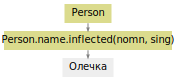

Person(
    position=None,
    name='зарина',
    middle=None,
    surname=None
)

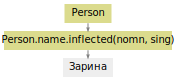

Person(
    position=None,
    name='надежда',
    middle='павловна',
    surname=None
)

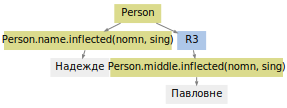

Person(
    position='спикер',
    name='дмитрия',
    middle=None,
    surname=None
)

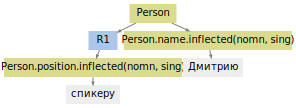

Person(
    position='президент',
    name='владимир',
    middle=None,
    surname=None
)

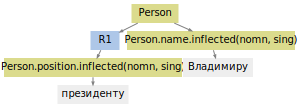

Person(
    position=None,
    name='иван',
    middle='олегович',
    surname=None
)

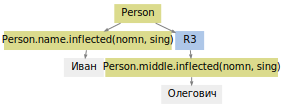

In [29]:
for match in parser1.findall(text_test): 
    display(match.fact)
    display(match.tree.as_dot)

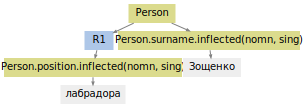

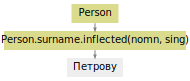

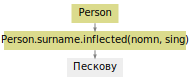

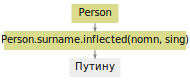

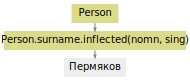

In [30]:
for match in parser2.findall(text_test): 
    display(match.tree.as_dot)

In [31]:
spans = [_.span for _ in parser2.findall(text_test)]
show_markup(text_test, spans)

Олечка, Кирюша, Олима и Зарина нашли кота Кадета и лабрадора Зощенко и
                                                   ─────────────────  
 отнесли их слесарю Петрову и его жене 
                    ───────            
Надежде Павловне, а они отдали их спикеру Дмитрию Пескову и президенту
                                                  ───────             
 Владимиру Путину. 
           ──────  
Иван Олегович Кадигроб сказал, что это большое событие. И все это 
благодаря помощи добрых Пермяков.
                        ──────── 


Итог проверки на искусственной строке.

Находит славянские и неславянские имена, но не все и не во всех формах. Находит "Зухра" и "Зарина", но "Олима" - нет. Находит "Олечка", но не находит "Кирюша" (только "Кирилл").

Нашелся "лабрадор Зощенко" и "кот Гюго", но не нашлись "кот Кадет" и "лабрадор Персик" :(

Общий итог.

Я не совсем понимаю, как работат поиск сущностей в Yargy. 

В репозитории в папке data выложены словари имен, фамилий и спорных элементов (maybe_last). Нет отдельного словаря для отчеств, хотя есть такой gram и они извлекаются по нему вполне успешно. В других словарях отчеств тоже нет. Вместе с тем, не все, что есть в словарях имен и фамилий, находится в предложенном тексте (фамилия "Кадигроб" в тестовом тексте выше - точно есть в словаре, но не извлекается). И наоброт: в словаре имен точно нет слов "хрюня" и "кипиш", однако они извлекаются из текста как имена. 

Полагаю, что происходит не сравнение со словаерм, а работает предобученная модель. Модели slovnet - тоже часть проекта Natasha. https://github.com/natasha/slovnet

## Подвал

In [ ]:
PERSON.normalized.as_bnf  # так можно посмотреть схему того, как работает правило 

Ниже ⬇︎ скрипт морфологического рабор текста, с ним удобно сверяться, когда непонятно, как интепретируются токены при парсинге.

+ несколько любопытных слов отдельно, чтобы не искать.

In [ ]:
from yargy.tokenizer import MorphTokenizer
tokenizer = MorphTokenizer()
list(tokenizer(text))

In [ ]:
MorphToken(
     value='Островитян',
     span=[1998, 2008),
     type='RU',
     forms=[Form('островитянин', Grams(NOUN,anim,gent,masc,plur)),
      Form('островитянин', Grams(NOUN,accs,anim,masc,plur))]

In [ ]:
MorphToken(
     value='кот',
     span=[2281, 2284),
     type='RU',
     forms=[Form('кот', Grams(NOUN,anim,masc,nomn,sing))]
 ),
 MorphToken(
     value='Кипиш',
     span=[2285, 2290),
     type='RU',
     forms=[Form('кипиш', Grams(NOUN,Name,anim,masc,nomn,sing))]

In [ ]:
MorphToken(
     value='Кипиша',
     span=[2557, 2563),
     type='RU',
     forms=[Form('киписать', Grams(GRND,impf,pres,tran)),
      Form('кипиш', Grams(NOUN,Name,anim,gent,masc,sing)),
      Form('кипиш', Grams(NOUN,Name,accs,anim,masc,sing))]

In [ ]:
MorphToken(
     value='Пермяков',
     span=[1165, 1173),
     type='RU',
     forms=[Form('пермяк', Grams(NOUN,anim,gent,masc,plur)),
      Form('пермяк', Grams(NOUN,accs,anim,masc,plur)),
      Form('пермяков', Grams(NOUN,Sgtm,Surn,anim,masc,nomn,sing))]
 ),